### 6) 로지스틱 회귀 모형의 class-weight

In [23]:
import pandas as pd

df = pd.read_csv("c:/workspace3/data/iris.csv")
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [24]:
#처음 40행 제거

df2=df.drop(df.index[range(40)])

In [25]:
df2.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Species'],
      dtype='object')

In [26]:
cols=['SepalLength','SepalWidth','PetalLength', 'PetalWidth']

X = df2[cols]
y = df2['Species']

df2.Species.value_counts() #불균형 데이터셋

#   0   1   2               0   1   2
#   50  50  50      =>      10  50  50

Species
1    50
2    50
0    10
Name: count, dtype: int64

In [28]:
df2

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
40,5.0,3.5,1.3,0.3,setosa,0
41,4.5,2.3,1.3,0.3,setosa,0
42,4.4,3.2,1.3,0.2,setosa,0
43,5.0,3.5,1.6,0.6,setosa,0
44,5.1,3.8,1.9,0.4,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


Text(0.5, 1.0, 'iris\n (0: setosa, 1: versicolor, 2: virginica )')

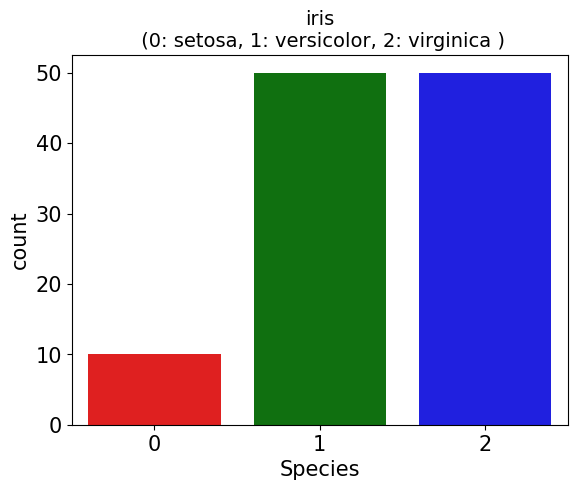

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["red", "green", "blue"]

sns.countplot(x='Species', data=df2, palette=colors)
plt.title('iris\n (0: setosa, 1: versicolor, 2: virginica )', fontsize=14)

In [ ]:
#불균형 데이터셋의 경우 언더샘플링 또는 오버샘플링을 하는 것이 일반적인 방법이지만
#여기서는 class_weight 속성을 알아보기 위해 샘플링 과정을 생략함

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

y_train.value_counts()

Species
1    40
2    40
0     8
Name: count, dtype: int64

In [32]:
from sklearn.linear_model import LogisticRegression

#기본 옵션 : 모든 클래스에 1이 부여됨(가중치 없음)
logit1 = LogisticRegression(random_state=0)
#                                                   0   1   2
#                                                   10  50  50

#샘플수에 반비례하는 가중치를 n_samples / (n_classes * np.bincount (y))로 자동 조정
logit2 = LogisticRegression(random_state=0, class_weight='balanced')
#                                                  샘플비율 고려

#가중치를 직접 입력하는 옵션
logit3 = LogisticRegression(random_state=0, class_weight={0:3, 1:1, 2:2})
#                                                   직접 지정
#                                                   0   1   2
#                                                   30  50  100

In [33]:
# class_weight='balanced'일 경우 샘플 개수에 반비례하는 가중치가 곱해짐

import numpy as np

print(np.bincount(y)) # 샘플의 개수(10/50/50)

# n_samples / (n_classes * np.bincount (y))
print(88 / (3 * np.bincount(y)))

[10 50 50]
[2.93333333 0.58666667 0.58666667]


In [34]:
for logit in [logit1,logit2,logit3]:
    logit.fit(X_train, y_train)

    print(logit)
    print("학습용:",logit.score(X_train, y_train))
    print("검증용:",logit.score(X_test, y_test))
    print()

# logit3 모형은 class 0의 샘플수가 너무 적으므로 경고 메시지가 출력될 수 있음

LogisticRegression(random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

LogisticRegression(class_weight='balanced', random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

LogisticRegression(class_weight={0: 3, 1: 1, 2: 2}, random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

